In [4]:
import pandas as pd
from entsoe import EntsoePandasClient
import matplotlib.pyplot as plt

In [5]:
# read api-key from file

file_object = open("entsoe_api.txt", "r")
api_key = file_object.read()

In [6]:
# get load from api
# https://github.com/EnergieID/entsoe-py
# https://transparency.entsoe.eu/

client = EntsoePandasClient(api_key=api_key)

start = pd.Timestamp("20220101", tz="Europe/Stockholm") 
end = pd.Timestamp("20230101", tz="Europe/Stockholm")
country_code = "SE"
df_load = client.query_load(country_code, start=start, end=end)
print(df_load.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7975 entries, 2022-01-01 00:00:00+01:00 to 2022-11-29 06:00:00+01:00
Freq: 60T
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Actual Load  7975 non-null   float64
dtypes: float64(1)
memory usage: 124.6 KB
None


In [10]:
display(df_load.head())

,Actual Load
2022-01-01 00:00:00+01:00,15438.0
2022-01-01 01:00:00+01:00,15331.0
2022-01-01 02:00:00+01:00,15331.0
2022-01-01 03:00:00+01:00,15270.0
2022-01-01 04:00:00+01:00,15150.0


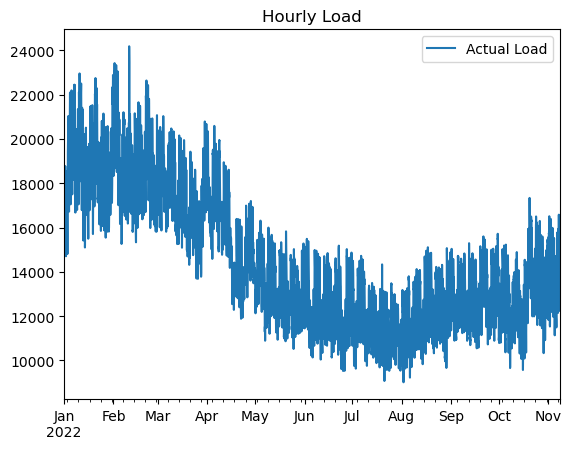

In [9]:
df_load.plot(title = 'Hourly Load')
plt.show()

In [10]:
gen_imp = client.query_generation_import('SE_3', start=start,end=end)
gen_imp

Generation                                       \
                          Fossil Gas Hydro Water Reservoir Marine Nuclear   
2022-01-01 00:00:00+01:00        0.0                 824.0    0.0  5841.0   
2022-01-01 01:00:00+01:00        0.0                 818.0    0.0  5842.0   
2022-01-01 02:00:00+01:00        0.0                 818.0    0.0  5839.0   
2022-01-01 03:00:00+01:00        0.0                 838.0    0.0  5839.0   
2022-01-01 04:00:00+01:00        0.0                 842.0    0.0  5840.0   
...                              ...                   ...    ...     ...   
2022-11-29 03:00:00+01:00        0.0                 861.0    0.0  5744.0   
2022-11-29 04:00:00+01:00        0.0                 850.0    0.0  5744.0   
2022-11-29 05:00:00+01:00        0.0                 872.0    0.0  5743.0   
2022-11-29 06:00:00+01:00        0.0                 988.0    0.0  5743.0   
2022-11-29 07:00:00+01:00        0.0                 988.0    0.0  5743.0   

                                                    Import               \
                           Other Solar Wind Onshore   DK_1   FI    NO_1   
2022-01-01 00:00:00+01:00  892.0   0.0       1062.0    0.0  0.0     0.0   
2022-01-01 01:00:00+01:00  851.0   0.0        999.0    0.0  0.0     0.0   
2022-01-01 02:00:00+01:00  858.0   0.0        958.0    0.0  0.0     0.0   
2022-01-01 03:00:00+01:00  859.0   0.0        888.0    0.0  0.0     0.0   
2022-01-01 04:00:00+01:00  856.0   0.0        788.0    0.0  0.0     0.0   
...                          ...   ...          ...    ...  ...     ...   
2022-11-29 03:00:00+01:00  956.0   0.0        671.0    0.0  0.0     0.0   
2022-11-29 04:00:00+01:00  963.0   0.0        649.0    0.0  0.0   492.0   
2022-11-29 05:00:00+01:00  977.0   0.0        639.0    0.0  0.0   729.0   
2022-11-29 06:00:00+01:00  989.0   0.0        620.0    0.0  0.0  1329.0   
2022-11-29 07:00:00+01:00  989.0   0.0        582.0    0.0  0.0  1696.0   

                                        
                             SE_2 SE_4  
2022-01-01 00:00:00+01:00  4836.0  0.0  
2022-01-01 01:00:00+01:00  4421.0  0.0  
2022-01-01 02:00:00+01:00  4618.0  0.0  
2022-01-01 03:00:00+01:00  4749.0  0.0  
2022-01-01 04:00:00+01:00  4229.0  0.0  
...                           ...  ...  
2022-11-29 03:00:00+01:00  5893.0  0.0  
2022-11-29 04:00:00+01:00  5842.0  0.0  
2022-11-29 05:00:00+01:00  6346.0  0.0  
2022-11-29 06:00:00+01:00  7109.0  0.0  
2022-11-29 07:00:00+01:00  7252.0  0.0  

[7976 rows x 12 columns]